In [2]:
%matplotlib inline

import numpy as np
from numpy import array 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix

from collections import Counter
from collections import defaultdict

from sklearn import tree
import scikitplot as skplt

from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.tree import DecisionTreeClassifier

import scikitplot as skplt
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

#### df_train_multi =  TRAIN dataset multiclasse

In [3]:
df_train_multi = pd.read_csv("Train_set.csv")
df_train_multi = df_train_multi.drop(columns = ["Unnamed: 0"])

In [4]:
df_train_multi

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",label
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,2
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,2
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,2
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,2


# 

### df_test_multi = TEST set multiclasse

In [5]:
df_test_multi = pd.read_csv("Test_set.csv")
df_test_multi = df_test_multi.drop(columns = ["Unnamed: 0"])
df_test_multi

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",label
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,5
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,5
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,5
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,5
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,2
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,2
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,2
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,2


In [21]:
df_test_multi.isna().any().sum()

0

#### df_train_binary = TRAIN dataframe bi-classe

In [22]:
df_train_binary = df_train_multi.copy()
df_train_binary["label"]

0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: label, Length: 7352, dtype: int64

In [23]:
df_train_binary["label"] = df_train_binary["label"].map({1:1,
                                 2:1,
                                 3:1,
                                 4:0,
                                 5:0,
                                 6:0})
df_train_binary["label"].head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

#### df_test_binary = TEST dataframe bi-classe

In [24]:
df_test_binary = df_test_multi.copy()
df_test_binary["label"]

0       5
1       5
2       5
3       5
4       5
       ..
2942    2
2943    2
2944    2
2945    2
2946    2
Name: label, Length: 2947, dtype: int64

In [25]:
df_test_binary["label"] = df_test_binary["label"].map({1:1,
                                 2:1,
                                 3:1,
                                 4:0,
                                 5:0,
                                 6:0})
df_test_binary

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",label
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,0
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,0
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,0
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,0
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,1
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,1
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,1
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,1


In [26]:
df_test_binary["label"].value_counts()

0    1560
1    1387
Name: label, dtype: int64

## 

## Correlation Matrix

In [12]:
df_train_multi.loc[:, df_train_multi.columns!='label'].corr()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,1.000000,0.148061,-0.256952,0.000619,-0.021903,-0.044617,0.006290,-0.022754,-0.047558,0.044062,...,0.030681,-0.017557,-0.015613,-0.544320,0.012173,0.037444,0.028844,-0.035257,0.034371,0.028242
tBodyAcc-mean()-Y,0.148061,1.000000,-0.078769,-0.045160,-0.044920,-0.049746,-0.044180,-0.045049,-0.050402,-0.038108,...,-0.022395,-0.001587,-0.004459,0.070559,-0.013541,0.017967,0.075679,-0.005309,0.001053,-0.013903
tBodyAcc-mean()-Z,-0.256952,-0.078769,1.000000,-0.020217,-0.016641,-0.008410,-0.018747,-0.015203,-0.001988,-0.037197,...,-0.020481,0.020091,0.019127,0.052841,-0.039836,-0.063609,-0.034037,0.008587,-0.015288,-0.022643
tBodyAcc-std()-X,0.000619,-0.045160,-0.020217,1.000000,0.927461,0.851668,0.998632,0.920888,0.846392,0.980844,...,-0.065987,0.148034,0.115565,-0.035011,-0.021633,0.018985,-0.024810,-0.371653,0.471065,0.394825
tBodyAcc-std()-Y,-0.021903,-0.044920,-0.016641,0.927461,1.000000,0.895510,0.922803,0.997347,0.894509,0.917366,...,-0.105621,0.206227,0.176946,-0.020379,-0.012505,-0.008507,-0.014592,-0.380531,0.523600,0.433169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",0.037444,0.017967,-0.063609,0.018985,-0.008507,-0.018429,0.019389,-0.012546,-0.023525,0.025066,...,-0.026615,0.034514,0.024553,-0.006269,0.009141,1.000000,-0.116001,-0.005853,-0.012313,-0.019903
"angle(tBodyGyroJerkMean,gravityMean)",0.028844,0.075679,-0.034037,-0.024810,-0.014592,-0.006471,-0.024951,-0.012341,-0.007231,-0.028871,...,0.000102,-0.017937,-0.014865,-0.020823,0.035263,-0.116001,1.000000,0.023995,-0.005869,-0.005656
"angle(X,gravityMean)",-0.035257,-0.005309,0.008587,-0.371653,-0.380531,-0.345011,-0.368191,-0.377025,-0.347389,-0.384192,...,0.087332,-0.086006,-0.079751,0.011880,0.023246,-0.005853,0.023995,1.000000,-0.783848,-0.643655
"angle(Y,gravityMean)",0.034371,0.001053,-0.015288,0.471065,0.523600,0.476006,0.466424,0.525081,0.477607,0.480229,...,-0.100125,0.086993,0.078079,0.001540,-0.012990,-0.012313,-0.005869,-0.783848,1.000000,0.594885


In [103]:
# Create correlation matrix
corr_matrix = df_train_multi.loc[:, df_train_multi.columns!='label'].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

C:\Users\daddu\AppData\Local\Temp/ipykernel_6744/3423281688.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [104]:
# Drop features 
df3 = df_train_multi.drop(to_drop, axis=1)
df3

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,"tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,4",...,fBodyBodyAccJerkMag-skewness(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-skewness(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)",label
0,0.288585,-0.020294,-0.132905,-0.995279,-0.058526,0.256892,0.264106,-0.095246,0.278851,-0.190884,...,-0.516080,-0.989498,-1.000000,0.586156,-1.000000,-0.298676,-0.112754,-0.464761,-0.018446,5
1,0.278419,-0.016411,-0.123520,-0.998245,0.284595,0.115705,0.294310,-0.281211,0.085988,-0.220643,...,-0.624871,-0.991829,-0.948718,-0.336310,-1.000000,-0.595051,0.053477,-0.732626,0.703511,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.164739,0.017150,0.342256,-0.332564,0.239281,-0.299493,...,-0.724697,-0.995703,-0.794872,-0.535352,-0.555556,-0.390748,-0.118559,0.100699,0.808529,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.264307,0.072545,0.323154,-0.170813,0.294938,-0.470129,...,-0.701131,-0.996199,-1.000000,-0.230091,-0.936508,-0.117290,-0.036788,0.640011,-0.485366,5
4,0.276629,-0.016570,-0.115362,-0.998139,0.086904,0.257615,0.434728,-0.315375,0.439744,-0.088952,...,-0.528901,-0.998353,-0.897436,-0.510282,-0.936508,-0.351471,0.123320,0.693578,-0.615971,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,-0.056751,-0.094106,-0.119821,0.293112,-0.425386,0.142117,...,-0.076714,-0.995117,-0.897436,-0.170845,-0.904762,-0.588433,-0.190437,0.206972,-0.425619,2
7348,0.273853,-0.007749,-0.147468,-0.235309,-0.154722,0.032725,0.034260,0.239835,-0.364480,-0.207505,...,-0.151879,-0.916112,-0.846154,0.019626,-0.904762,-0.390738,0.064907,-0.879033,0.400219,2
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.017019,-0.004323,0.119962,0.080689,-0.420093,0.016677,...,0.331457,-0.972099,-0.846154,0.490169,-0.904762,0.025145,0.052806,0.864404,0.701169,2
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.038354,-0.277801,0.101761,-0.108375,-0.438356,0.232444,...,0.038175,-0.959329,-0.846154,0.308105,-0.904762,0.063907,-0.101360,0.936674,-0.589479,2


##### df3 = TRAIN dataframe con correlazioni tra variabili minori dell'85%

## 

## Data Partitioning Multi & Binary


In [27]:
attributes = [col for col in df_test_multi.columns if col != 'label']

X_train = df_train_multi[attributes].values
y_train = np.array(df_train_multi['label'])
y_train_binary = np.array(df_train_binary["label"])

X_test = df_test_multi[attributes].values
y_test = np.array(df_test_multi['label'])
y_test_binary = np.array(df_test_binary["label"])

# 

# Decision Tree  - TEST_SET MULTICLASS

In [31]:
dt_max_depth = [2,3,5,6,7,10,12, None]
dt_min_samples_split = randint(2, 51)
min_samples_leaf = randint(1, 51)
criterion = ["entropy", "gini"]
splitter = ["best", "random"]
max_features = [None, 2, 3, 4, 5]

dt_param_grid = {
    "max_depth": dt_max_depth,
    "min_samples_split": dt_min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "criterion": criterion,
    "splitter": splitter,
    "max_features": max_features
            }

dt_grid = RandomizedSearchCV(tree.DecisionTreeClassifier(), param_distributions=dt_param_grid,
                            scoring=make_scorer(accuracy_score))

In [47]:
dt_grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 5, 6, 7, 10, 12,
                                                      None],
                                        'max_features': [None, 2, 3, 4, 5],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021B7F5DF9A0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021B7F9C8BB0>,
                                        'splitter': ['best', 'random']},
                   scoring=make_scorer(accuracy_score))

In [48]:
print(dt_grid.best_params_)

{'criterion': 'entropy', 'max_depth': 12, 'max_features': 5, 'min_samples_leaf': 27, 'min_samples_split': 2, 'splitter': 'best'}


In [49]:
decision_tree = tree.DecisionTreeClassifier(**dt_grid.best_params_).fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
print("CLASSIFICATION REPORT DECISION TREE - TEST\n")
print(classification_report(y_test, y_pred))

CLASSIFICATION REPORT DECISION TREE - TEST

              precision    recall  f1-score   support

           1       0.71      0.86      0.78       496
           2       0.76      0.70      0.73       471
           3       0.79      0.67      0.72       420
           4       0.65      0.56      0.61       491
           5       0.64      0.77      0.70       532
           6       0.82      0.75      0.78       537

    accuracy                           0.72      2947
   macro avg       0.73      0.72      0.72      2947
weighted avg       0.73      0.72      0.72      2947



In [50]:
decision_tree.feature_importances_
imp_dict = {attr: decision_tree.feature_importances_[i] for i, attr in enumerate(attributes)}

attributi = {k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1], reverse=True)}
lista_attributi = list(attributi.items())
lista_attributi[:11]

[('fBodyAccJerk-sma()', 0.5033990187488347),
 ('fBodyAcc-meanFreq()-Z', 0.04137779664217798),
 ('fBodyBodyGyroMag-maxInds', 0.040409144444020814),
 ('tGravityAcc-min()-Y', 0.02785290956485616),
 ('tGravityAcc-arCoeff()-Z,4', 0.026412991384708727),
 ('tGravityAcc-std()-X', 0.02499998093333352),
 ('tGravityAcc-max()-Y', 0.021013830810512498),
 ('fBodyAcc-max()-X', 0.02024876702099725),
 ('tBodyAccMag-std()', 0.015630894133601102),
 ('fBodyGyro-bandsEnergy()-1,8', 0.014566322848836969),
 ('fBodyAcc-mad()-Z', 0.012466679426372907)]

<AxesSubplot:title={'center':'DT ROC Curve Pre-Assestment'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

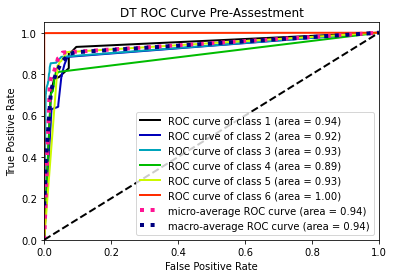

In [52]:
y_decision_tree = decision_tree.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_decision_tree, title= "DT ROC Curve Pre-Assestment")

In [44]:
predictions_dt = cross_val_predict(decision_tree, X_test, y_test)

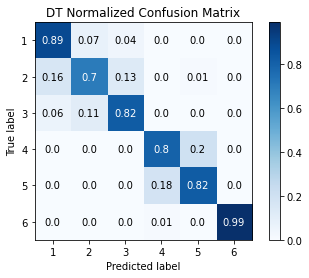

In [45]:
skplt.metrics.plot_confusion_matrix(y_test, predictions_dt, normalize=True)
plt.title('DT Normalized Confusion Matrix')
plt.show()

In [26]:
scores = cross_val_score(decision_tree, X_train, y_train, cv=10, scoring='accuracy')

In [27]:
print("Cross Validation DT:\t", round(scores.mean(),3))

Cross Validation DT:	 0.862


# 

# Decision Tree  - TEST_SET BINARY CLASS

In [51]:
dt_grid2 = RandomizedSearchCV(tree.DecisionTreeClassifier(), param_distributions=dt_param_grid,
                            scoring=make_scorer(accuracy_score))

In [52]:
dt_grid2.fit(X_train, y_train_binary)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 5, 6, 7, 10, 12,
                                                      None],
                                        'max_features': [None, 2, 3, 4, 5],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021B7F5DF9A0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021B7F9C8BB0>,
                                        'splitter': ['best', 'random']},
                   scoring=make_scorer(accuracy_score))

In [53]:
print(dt_grid.best_params_)

{'criterion': 'entropy', 'max_depth': 12, 'max_features': 5, 'min_samples_leaf': 27, 'min_samples_split': 2, 'splitter': 'best'}


In [54]:
decision_tree_binary = tree.DecisionTreeClassifier(**dt_grid2.best_params_).fit(X_train, y_train_binary)

y_pred_binary = decision_tree_binary.predict(X_test)

print(classification_report(y_test_binary, y_pred_binary))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1560
           1       1.00      1.00      1.00      1387

    accuracy                           1.00      2947
   macro avg       1.00      1.00      1.00      2947
weighted avg       1.00      1.00      1.00      2947



In [55]:
decision_tree_binary.feature_importances_
imp_dict = {attr: decision_tree_binary.feature_importances_[i] for i, attr in enumerate(attributes)}

attributi_binary = {k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1], reverse=True)}
lista_attributi_binary = list(attributi_binary.items())
lista_attributi_binary[:11]

[('fBodyAccJerk-bandsEnergy()-1,16', 0.997780411538897),
 ('tBodyAccJerk-iqr()-Z', 0.0011309515609814551),
 ('tBodyAcc-correlation()-X,Z', 0.0010886369001215002),
 ('tBodyAcc-mean()-X', 0.0),
 ('tBodyAcc-mean()-Y', 0.0),
 ('tBodyAcc-mean()-Z', 0.0),
 ('tBodyAcc-std()-X', 0.0),
 ('tBodyAcc-std()-Y', 0.0),
 ('tBodyAcc-std()-Z', 0.0),
 ('tBodyAcc-mad()-X', 0.0),
 ('tBodyAcc-mad()-Y', 0.0)]

In [62]:
knn_binary = KNeighborsClassifier(**knn_grid.best_params_).fit(X_train, y_train_binary)
y_pred_knn_binary = knn_binary.predict(X_test)
print(classification_report(y_test_binary, y_pred_knn_binary))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1560
           1       1.00      1.00      1.00      1387

    accuracy                           1.00      2947
   macro avg       1.00      1.00      1.00      2947
weighted avg       1.00      1.00      1.00      2947



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

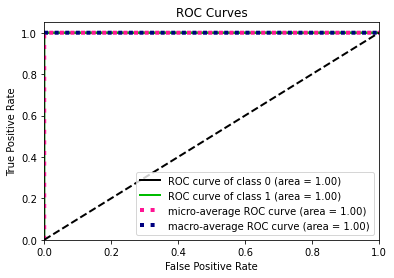

In [63]:
y_decision_tree_binary = decision_tree_binary.predict_proba(X_test)
skplt.metrics.plot_roc(y_test_binary, y_decision_tree_binary)

In [58]:
predictions_dt_binary = cross_val_predict(decision_tree_binary, X_test, y_test_binary)

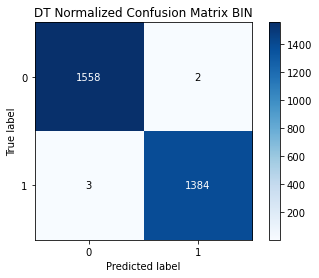

In [59]:
skplt.metrics.plot_confusion_matrix(y_test_binary, predictions_dt_binary)
plt.title('DT Normalized Confusion Matrix BIN')
plt.show()

In [64]:
scores2 = cross_val_score(decision_tree_binary, X_train, y_train, cv=10, scoring='accuracy')

In [65]:
print("Cross Validation DT:\t", round(scores2.mean(),3))

Cross Validation DT:	 0.865


# 

# KNN 6 classi - TEST_SET

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [46]:
k_range = range(1,11)
knn_metrics = ['euclidean', 'manhattan']
knn_weights = ['uniform', 'distance']

knn_param_grid = {
    'n_neighbors': k_range,
    'metric': knn_metrics,
    'weights': knn_weights
            }

In [47]:
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, scoring='accuracy')
knn_grid.fit(X_train, y_train)

# ATTENZIONE!! CI METTE UN BOTTO A RUNNARE (20 min)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 11),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [48]:
# examine the best model
print('Accuracy: ' + str(knn_grid.best_score_))
print('Parameters: ' + str(knn_grid.best_params_))

Accuracy: 0.9095522967854717
Parameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}


In [49]:
knn = KNeighborsClassifier(**knn_grid.best_params_).fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       0.87      0.98      0.92       496
           2       0.88      0.91      0.89       471
           3       0.97      0.79      0.87       420
           4       0.96      0.83      0.89       491
           5       0.86      0.97      0.91       532
           6       1.00      1.00      1.00       537

    accuracy                           0.92      2947
   macro avg       0.92      0.91      0.91      2947
weighted avg       0.92      0.92      0.92      2947



In [57]:
from sklearn import metrics

print("Accuracy:   \t\t", round(metrics.accuracy_score(y_test, y_pred_knn),4))
print('F1- Score:\t\t', round(metrics.f1_score(y_test, y_pred_knn,average = "macro"),3))

Accuracy:   		 0.9179
F1- Score:		 0.914


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

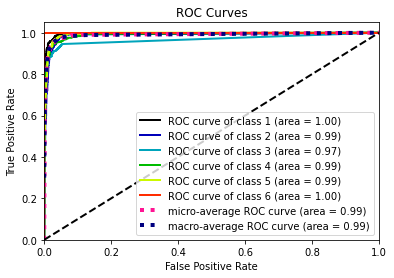

In [47]:
y_knn = knn.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_knn)

In [297]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#compute and plot the confusion matrix 
def plot_c_matrix(test_set, test_label, test_pred, classifier, classifier_name, axs=None):
    cm = confusion_matrix(test_label, test_pred)
    if axs:
        plot_confusion_matrix(classifier, test_set, test_label, ax=axs)
    else:
        plot_confusion_matrix(classifier, test_set, test_label)
    plt.title('Confusion matrix of ' + classifier_name)
    plt.show() 

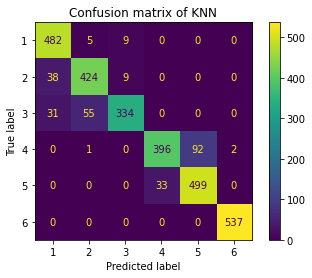

In [298]:
plot_c_matrix(X_test, y_test, y_pred_knn, knn, 'KNN')

In [94]:
scores3 = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')

In [95]:
print("Cross Validation DT:\t", round(scores3.mean(),3))

Cross Validation DT:	 0.918


# 

# Variance Threshold

In [108]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(0.19))
X_train_sel = sel.fit_transform(X_train)

X_train_sel.shape

(7352, 67)

In [689]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7875805904309467
F1-score [0.76950998 0.66666667 0.82439024 0.70219436 0.73829201 1.        ]
              precision    recall  f1-score   support

           1       0.70      0.85      0.77       496
           2       0.75      0.60      0.67       471
           3       0.84      0.80      0.82       420
           4       0.72      0.68      0.70       491
           5       0.72      0.76      0.74       532
           6       1.00      1.00      1.00       537

    accuracy                           0.79      2947
   macro avg       0.79      0.78      0.78      2947
weighted avg       0.79      0.79      0.79      2947



# 

# Univariate Feature Selection

In [109]:
from sklearn.feature_selection import SelectKBest

In [117]:
sel = SelectKBest(k=50)
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape

(7352, 50)

In [118]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8059043094672549
F1-score [0.78627451 0.74971165 0.75986471 0.74745418 0.76691729 1.        ]
              precision    recall  f1-score   support

           1       0.77      0.81      0.79       496
           2       0.82      0.69      0.75       471
           3       0.72      0.80      0.76       420
           4       0.75      0.75      0.75       491
           5       0.77      0.77      0.77       532
           6       1.00      1.00      1.00       537

    accuracy                           0.81      2947
   macro avg       0.80      0.80      0.80      2947
weighted avg       0.81      0.81      0.81      2947



# 

# Recursive Feature Elimination

In [68]:
from sklearn.feature_selection import SelectFromModel

In [91]:
sel = SelectFromModel(DecisionTreeClassifier(**dt_grid.best_params_))
X_train_sel = sel.fit_transform(X_train, y_train)

X_test_sel = sel.transform(X_test)
X_train_sel.shape

(7352, 29)

In [570]:


clf = DecisionTreeClassifier(**dt_grid.best_params_)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8513742789277231
F1-score [0.87833828 0.76837416 0.81387283 0.79789474 0.82481752 1.        ]
              precision    recall  f1-score   support

           1       0.86      0.90      0.88       496
           2       0.81      0.73      0.77       471
           3       0.79      0.84      0.81       420
           4       0.83      0.77      0.80       491
           5       0.80      0.85      0.82       532
           6       1.00      1.00      1.00       537

    accuracy                           0.85      2947
   macro avg       0.85      0.85      0.85      2947
weighted avg       0.85      0.85      0.85      2947



In [92]:
knn2 = KNeighborsClassifier(**knn_grid.best_params_).fit(X_train_sel, y_train)
y_pred_knn2 = knn2.predict(X_test_sel)
print(classification_report(y_test, y_pred_knn2))

              precision    recall  f1-score   support

           1       0.86      0.96      0.91       496
           2       0.86      0.88      0.87       471
           3       0.98      0.83      0.90       420
           4       0.91      0.79      0.84       491
           5       0.82      0.93      0.87       532
           6       1.00      0.99      1.00       537

    accuracy                           0.90      2947
   macro avg       0.91      0.90      0.90      2947
weighted avg       0.90      0.90      0.90      2947



In [572]:
sfm = SelectFromModel(DecisionTreeClassifier(**dt_grid.best_params_))
sfm.fit(X_train,y_train)
lista = sfm.get_support()
lista = list(lista)
lista2 = []
for el in lista:
    lista2.append(str(el))

In [573]:
colonne_RFE_idx = []
for i,j in enumerate(lista2):
    if j == "True":
        colonne_RFE_idx.append(i)

In [579]:
df_RFE_train = df_train_multi.iloc[:, colonne_RFE_idx]
df_RFE_train["label"] = df_train_multi['label']

df_RFE_test = df_test_multi.iloc[:, colonne_RFE_idx]
df_RFE_test["label"] = df_test_multi['label']

df_RFE_train.to_csv("df_RFE_train.csv")
df_RFE_test.to_csv("df_RFE_test.csv")

C:\Users\daddu\AppData\Local\Temp/ipykernel_16304/916133959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RFE_train["label"] = df_train_multi['label']
C:\Users\daddu\AppData\Local\Temp/ipykernel_16304/916133959.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RFE_test["label"] = df_test_multi['label']


In [578]:
colonne_RFE = list(df_RFE_train.columns)
print(colonne_RFE, end="    ")
len(colonne_RFE)

['tBodyAcc-entropy()-X', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-Y', 'tGravityAcc-max()-X', 'tGravityAcc-max()-Z', 'tGravityAcc-min()-X', 'tGravityAcc-min()-Y', 'tGravityAcc-energy()-Y', 'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,3', 'tGravityAcc-arCoeff()-Z,2', 'tGravityAcc-arCoeff()-Z,4', 'tBodyGyro-max()-X', 'tBodyGyro-min()-X', 'tBodyGyro-arCoeff()-Y,1', 'tBodyGyro-correlation()-Y,Z', 'tBodyGyroJerk-iqr()-Y', 'tGravityAccMag-arCoeff()1', 'fBodyAcc-max()-X', 'fBodyAcc-max()-Y', 'fBodyAccJerk-max()-Y', 'fBodyAccJerk-bandsEnergy()-1,16', 'fBodyGyro-maxInds-X', 'fBodyGyro-meanFreq()-X', 'fBodyAccMag-mad()', 'fBodyAccMag-energy()', 'fBodyBodyGyroJerkMag-std()', 'angle(Y,gravityMean)', 'label']    

30

In [581]:
df_RFE_test

,tBodyAcc-entropy()-X,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-Y,tGravityAcc-max()-X,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-Y,1",...,fBodyAcc-max()-Y,fBodyAccJerk-max()-Y,"fBodyAccJerk-bandsEnergy()-1,16",fBodyGyro-maxInds-X,fBodyGyro-meanFreq()-X,fBodyAccMag-mad(),fBodyAccMag-energy(),fBodyBodyGyroJerkMag-std(),"angle(Y,gravityMean)",label
0,-0.168084,0.076989,-0.709003,-0.282719,0.906083,0.152895,0.944461,-0.262160,-0.864621,-0.795468,...,-0.940137,-0.958325,-0.998040,-1.000000,0.184035,-0.726707,-0.953984,-0.907308,0.276801,5
1,-0.302437,-0.104983,0.399177,-0.289215,0.856176,0.152895,0.944461,-0.262160,-0.858163,-0.745687,...,-0.974357,-0.987087,-0.999641,-1.000000,0.018109,-0.960680,-0.998476,-0.938212,0.281343,5
2,-0.617916,0.305653,0.279786,-0.287513,0.856269,0.139454,0.948704,-0.261661,-0.859947,-0.231640,...,-0.983773,-0.975581,-0.999954,-1.000000,-0.479145,-0.977176,-0.999570,-0.983273,0.280083,5
3,-0.749578,-0.063792,0.544916,-0.293396,0.856269,0.136124,0.947309,-0.272916,-0.853713,-0.233036,...,-0.987887,-0.979580,-0.999949,-1.000000,-0.496954,-0.976796,-0.999504,-0.985843,0.284114,5
4,-0.590576,0.235151,0.457718,-0.302961,0.853942,0.133541,0.946221,-0.279190,-0.843378,-0.493331,...,-0.972039,-0.975105,-0.999955,-1.000000,-0.427502,-0.975706,-0.999500,-0.990572,0.290722,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.128951,-0.258908,-0.022682,-0.276718,0.823272,0.226640,0.903413,-0.272203,-0.870515,-0.676626,...,-0.397114,-0.659382,-0.792017,-1.000000,-0.038775,-0.202661,-0.702110,-0.618829,0.274627,2
2943,0.311991,-0.249325,0.031417,-0.274976,0.823272,0.220590,0.903793,-0.268172,-0.872342,-0.548616,...,-0.363990,-0.604243,-0.807522,-1.000000,-0.258493,-0.196060,-0.674032,-0.592507,0.273578,2
2944,0.342902,-0.351080,0.118835,-0.276165,0.822107,0.220590,0.903793,-0.268172,-0.871197,-0.566802,...,-0.292071,-0.533585,-0.830224,-1.000000,-0.083427,-0.208208,-0.715711,-0.617948,0.274479,2
2945,0.194918,-0.190791,0.122642,-0.262356,0.823679,0.231517,0.909007,-0.244744,-0.884788,-0.641468,...,-0.415850,-0.661178,-0.838522,-0.933333,-0.242417,-0.259605,-0.745225,-0.654960,0.264782,2


# 

# Principal Component Analysis

In [136]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95).fit(X_train)
X_train_pca = pca.transform(X_train)

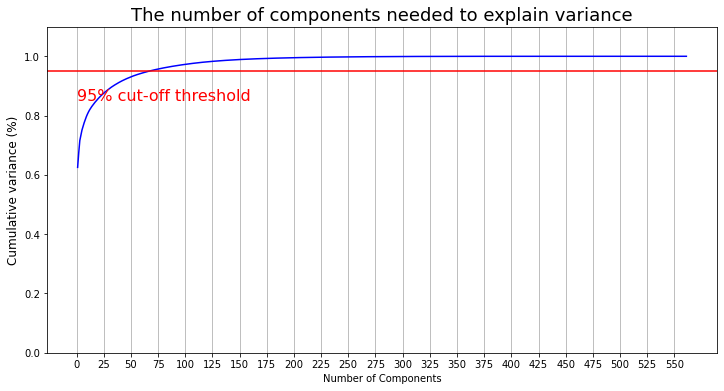

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 562, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, linestyle='-', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 562, step=25)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)',fontsize=12)
plt.title('The number of components needed to explain variance',fontsize=18)

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

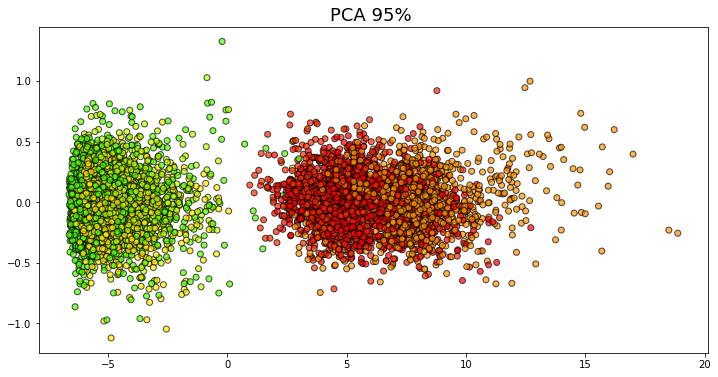

In [140]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, -1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.title("PCA 95% ", fontsize = 18)
plt.show()

In [602]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(**dt_grid.best_params_)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8038683406854428
F1-score [0.74385246 0.84778013 0.7010551  0.75529865 0.81142857 0.94665373]
              precision    recall  f1-score   support

           1       0.76      0.73      0.74       496
           2       0.84      0.85      0.85       471
           3       0.69      0.71      0.70       420
           4       0.72      0.80      0.76       491
           5       0.82      0.80      0.81       532
           6       0.99      0.91      0.95       537

    accuracy                           0.80      2947
   macro avg       0.80      0.80      0.80      2947
weighted avg       0.81      0.80      0.81      2947



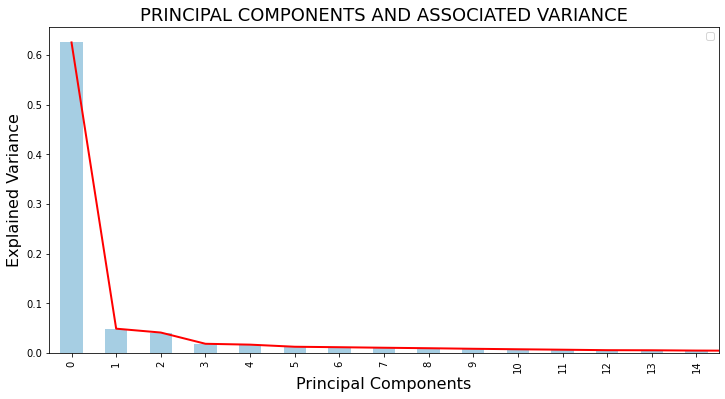

In [142]:
pd.DataFrame(pca.explained_variance_ratio_[0:15]).plot.bar(colormap='Paired')
plt.plot(PCA(n_components=67).fit(X_train).explained_variance_ratio_, lw=2, color='r', ms=2)
plt.legend('')
ax.plot()
plt.title("PRINCIPAL COMPONENTS AND ASSOCIATED VARIANCE",fontsize=18)
plt.xlabel('Principal Components',fontsize=16)
plt.ylabel('Explained Variance',fontsize=16);

In [611]:
pca

PCA(n_components=0.95)

# 

# t-SNE

In [144]:
from sklearn.manifold import TSNE

In [145]:
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne.shape

C:\Users\daddu\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\daddu\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(7352, 2)

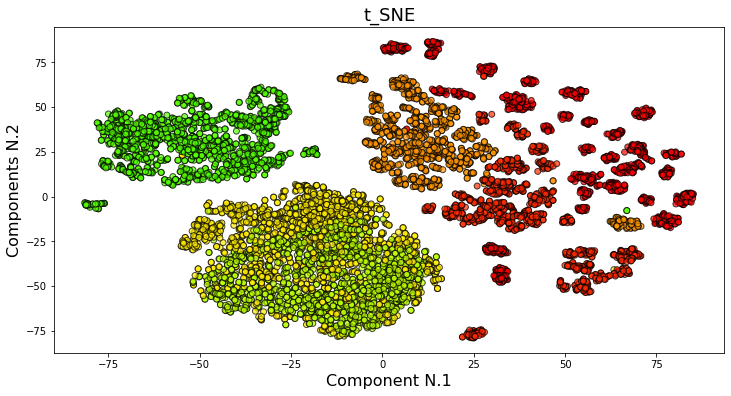

In [150]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.title("t_SNE",fontsize=18)
plt.xlabel('Component N.1',fontsize=16)
plt.ylabel('Components N.2',fontsize=16);
plt.show()

In [161]:
X_test_tsne = tsne.fit_transform(X_test)

C:\Users\daddu\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\daddu\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [157]:
knn3 = KNeighborsClassifier(**knn_grid.best_params_).fit(X_train_tsne, y_train)
y_pred_knn3 = knn3.predict(X_test_tsne)
print(classification_report(y_test, y_pred_knn3))

              precision    recall  f1-score   support

           1       0.13      0.11      0.12       496
           2       0.17      0.13      0.15       471
           3       0.38      0.57      0.45       420
           4       0.17      0.30      0.22       491
           5       0.25      0.12      0.16       532
           6       0.00      0.00      0.00       537

    accuracy                           0.19      2947
   macro avg       0.18      0.21      0.18      2947
weighted avg       0.18      0.19      0.17      2947



(array([[  11., 1360.,   36., ...,    0.,    0.,    0.],
        [  11., 1391.,    5., ...,    0.,    0.,    0.],
        [  20., 1382.,    5., ...,    0.,    0.,    0.],
        ...,
        [1039.,  332.,   36., ...,    0.,    0.,    0.],
        [1081.,  289.,   37., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0., 1407.]]),
 array([-1. , -0.3,  0.4,  1.1,  1.8,  2.5,  3.2,  3.9,  4.6,  5.3,  6. ]),
 <a list of 562 BarContainer objects>)

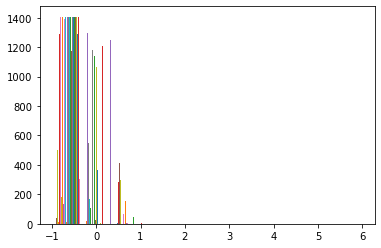

In [16]:
plt.hist(df_train_multi[df_train_multi["label"] == 6])